![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3              36.7             19.3              193.0       3450.0  FEMALE
4              39.3             20.6              190.0       3650.0    MALE


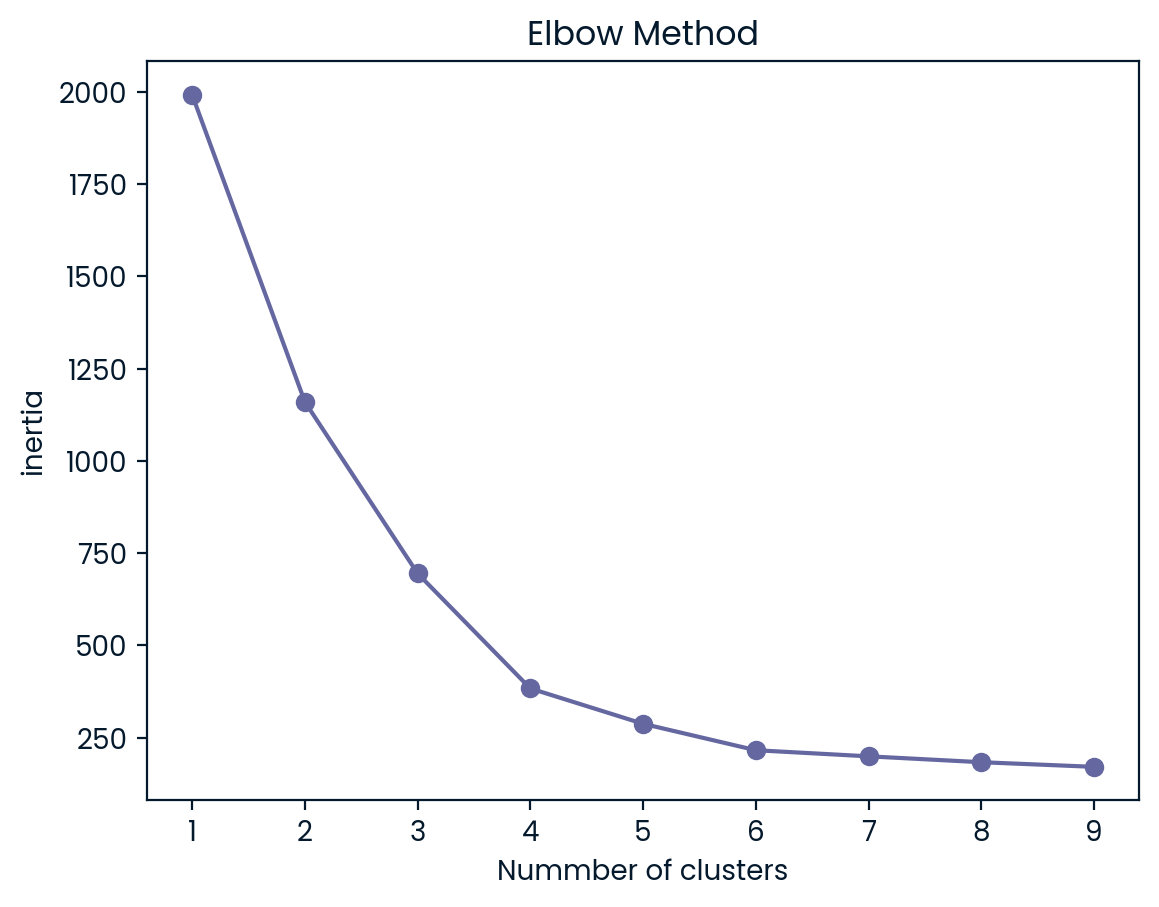

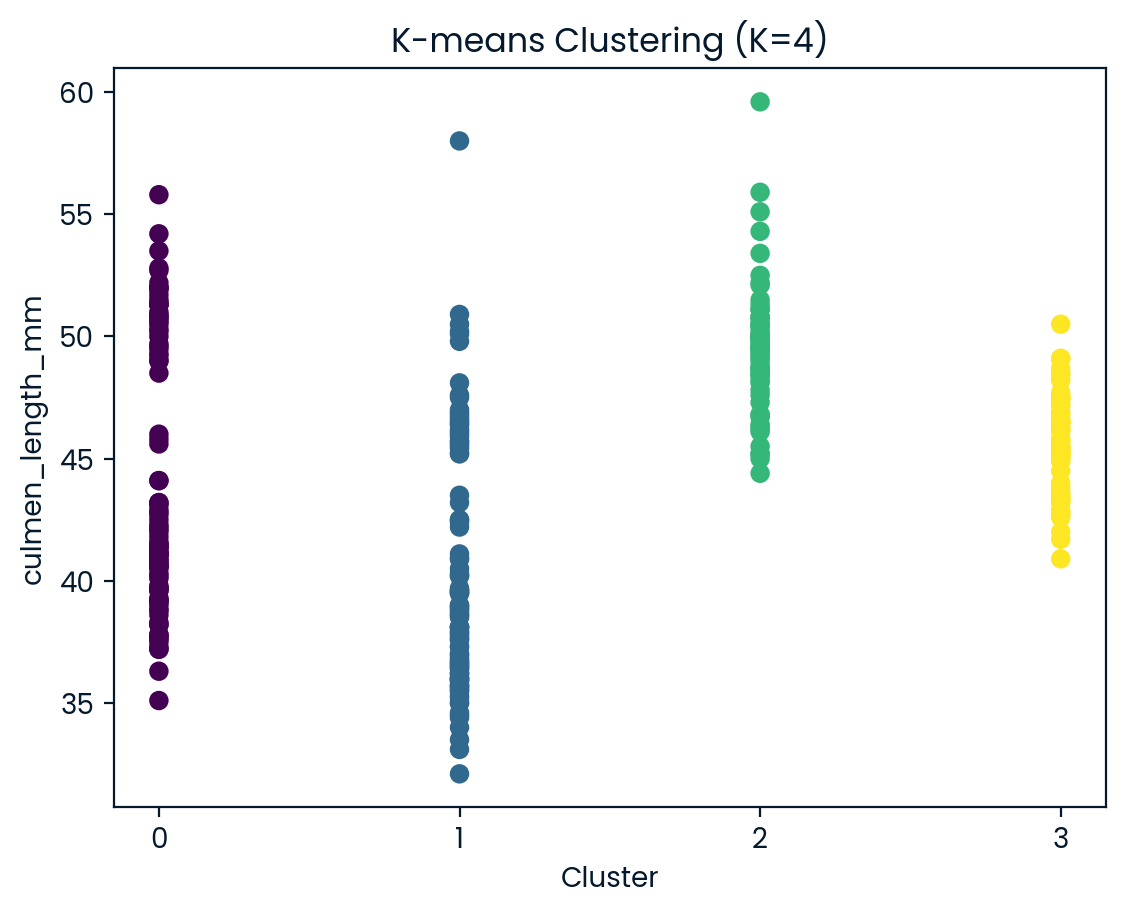

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,49.473770,15.718033,221.540984
3,45.563793,14.237931,212.706897


In [12]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
print(penguins_df.head())
penguins_df = pd.get_dummies(penguins_df,dtype='int')
scaled_penguins_df = StandardScaler().fit_transform(penguins_df)
penguins_preprocessed = pd.DataFrame(data=scaled_penguins_df,columns=penguins_df.columns)
inertia = []
for k in range(1, 10):
    model = KMeans(n_clusters=k, random_state=42).fit(penguins_preprocessed)
    inertia.append(model.inertia_)

plt.plot(range(1,10),inertia,marker='o')
plt.xlabel('Nummber of clusters')
plt.ylabel('inertia')
plt.title('Elbow Method')
plt.show()

model = KMeans(n_clusters=4, random_state=42).fit(penguins_preprocessed)
penguins_df['label'] = kmeans.labels_

plt.scatter(penguins_df['label'],penguins_df['culmen_length_mm'],c=model.labels_,cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()),int(penguins_df['label'].max())+1))
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
stat_penguins





